# Análisis de Subjetividad de Opiniones Turísticas

Este notebook realiza un análisis de subjetividad sobre las opiniones turísticas utilizando modelos preentrenados de HuggingFace para clasificar texto en: **Subjetivo vs Objetivo**.

## Objetivos:
- Aplicar modelo multilingüe especializado en análisis de subjetividad
- Generar estadísticas descriptivas y visualizaciones
- Analizar relación entre subjetividad y sentimientos (si están disponibles)

## Modelo utilizado:
- **GroNLP/mdebertav3-subjectivity-multilingual**: Modelo multilingüe especializado en análisis de subjetividad

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Cargar dataset con análisis de sentimientos
dataset_path_analisis = '../data/processed/dataset_opiniones_analisis.csv'

df = pd.read_csv(dataset_path_analisis)
ciudad = df['Ciudad'].iloc[0]

print(f"📍 Ciudad: {ciudad} | Filas: {df.shape[0]}")
df[['TituloReview', 'Calificacion', 'SentimientoPorHF']].head()

📍 Ciudad: Mazatlan | Filas: 2464


TituloReview  Calificacion  \
0  ¡Divertido y seguro!. Estoy muy impresionado c...             5   
1  Un mes en Mazatlán. Acabamos de pasar un mes e...             3   
2  Maravilloso. Ubicado en la zona más turística ...             5   
3  Caminando por el Malecón. Hermoso El Malecón d...             5   
4  Nunca más, por desgracia. Mazatlán no es segur...             1   

  SentimientoPorHF  
0         Positivo  
1         Negativo  
2         Positivo  
3         Positivo  
4         Negativo

In [2]:
import sys
sys.path.append('../scripts')
from subjetividad import AnalizadorHuggingFaceSubjetividad

analizador = AnalizadorHuggingFaceSubjetividad(
    modelo_nombre="GroNLP/mdebertav3-subjectivity-multilingual"
)
analizador.cargar_modelo()

Device set to use cpu


True

In [3]:
# Probar el modelo con algunos ejemplos
ejemplos_prueba = [
    "Me encantó este lugar, es increíble y lo recomiendo mucho",
    "El museo abre de 9:00 AM a 6:00 PM todos los días",
    "Qué experiencia tan horrible, no vuelvo nunca más"
]

for ejemplo in ejemplos_prueba:
    resultado = analizador.analizar_subjetividad_texto(ejemplo)
    print(f"'{ejemplo[:40]}...' → {resultado['categoria']}")

'Me encantó este lugar, es increíble y lo...' → Subjetivo
'El museo abre de 9:00 AM a 6:00 PM todos...' → Objetivo
'Qué experiencia tan horrible, no vuelvo ...' → Subjetivo


In [4]:
df_con_subjetividad = analizador.procesar_dataset_completo(df, 'TituloReview')



TituloReview  Calificacion  \
0  ¡Divertido y seguro!. Estoy muy impresionado c...             5   
1  Un mes en Mazatlán. Acabamos de pasar un mes e...             3   
2  Maravilloso. Ubicado en la zona más turística ...             5   
3  Caminando por el Malecón. Hermoso El Malecón d...             5   
4  Nunca más, por desgracia. Mazatlán no es segur...             1   
5  Tranquilo. Es enorme y con muchas esculturas, ...             4   
6  Espectacular. Todo me Encanto. Las comidas el ...             5   
7  Hermosa zona y gente maravillosa!. Bajamos dur...             5   
8  Caminando por el malecón. Caminamos desde el á...             4   
9  Paseo en familia. Un paseo excelente! La playa...             5   

  SubjetividadConHF  
0         Subjetivo  
1         Subjetivo  
2         Subjetivo  
3         Subjetivo  
4         Subjetivo  
5         Subjetivo  
6         Subjetivo  
7         Subjetivo  
8         Subjetivo  
9         Subjetivo

In [5]:
estadisticas = analizador.obtener_estadisticas_subjetividad(df_con_subjetividad)
analizador.mostrar_estadisticas_consola(estadisticas)

display(estadisticas['por_atraccion'].head(10))

📊 ESTADÍSTICAS DESCRIPTIVAS DE SUBJETIVIDAD
🔢 DISTRIBUCIÓN DE SUBJETIVIDAD:
----------------------------------------
 Subjetivo: 2272 registros ( 92.2%)
  Objetivo: 192 registros (  7.8%)

📈 TOTAL DE REGISTROS: 2464

📝 DESCRIPCIÓN DE CATEGORÍAS:
----------------------------------------
 Subjetivo: Texto que expresa opiniones, emociones, evaluaciones personales
  Objetivo: Texto que presenta hechos, información factual sin opiniones


SubjetividadConHF                Objetivo  Subjetivo
Atraccion                                           
Acuario Interactivo                     3         47
Acuario Mazatlan                        0         50
Acuario Michin Ciudad De Mexico         1         49
Acuario Michin Puebla                   1         49
Africam Safari                          0         50
Avenida Kukulkan                        7         43
Basilica De La Virgen Guadalupe         5         45
Callejon De Los Sapos                   1         49
Capilla Del Rosario                     0         50
Castillo De Chapultepec                 5         35

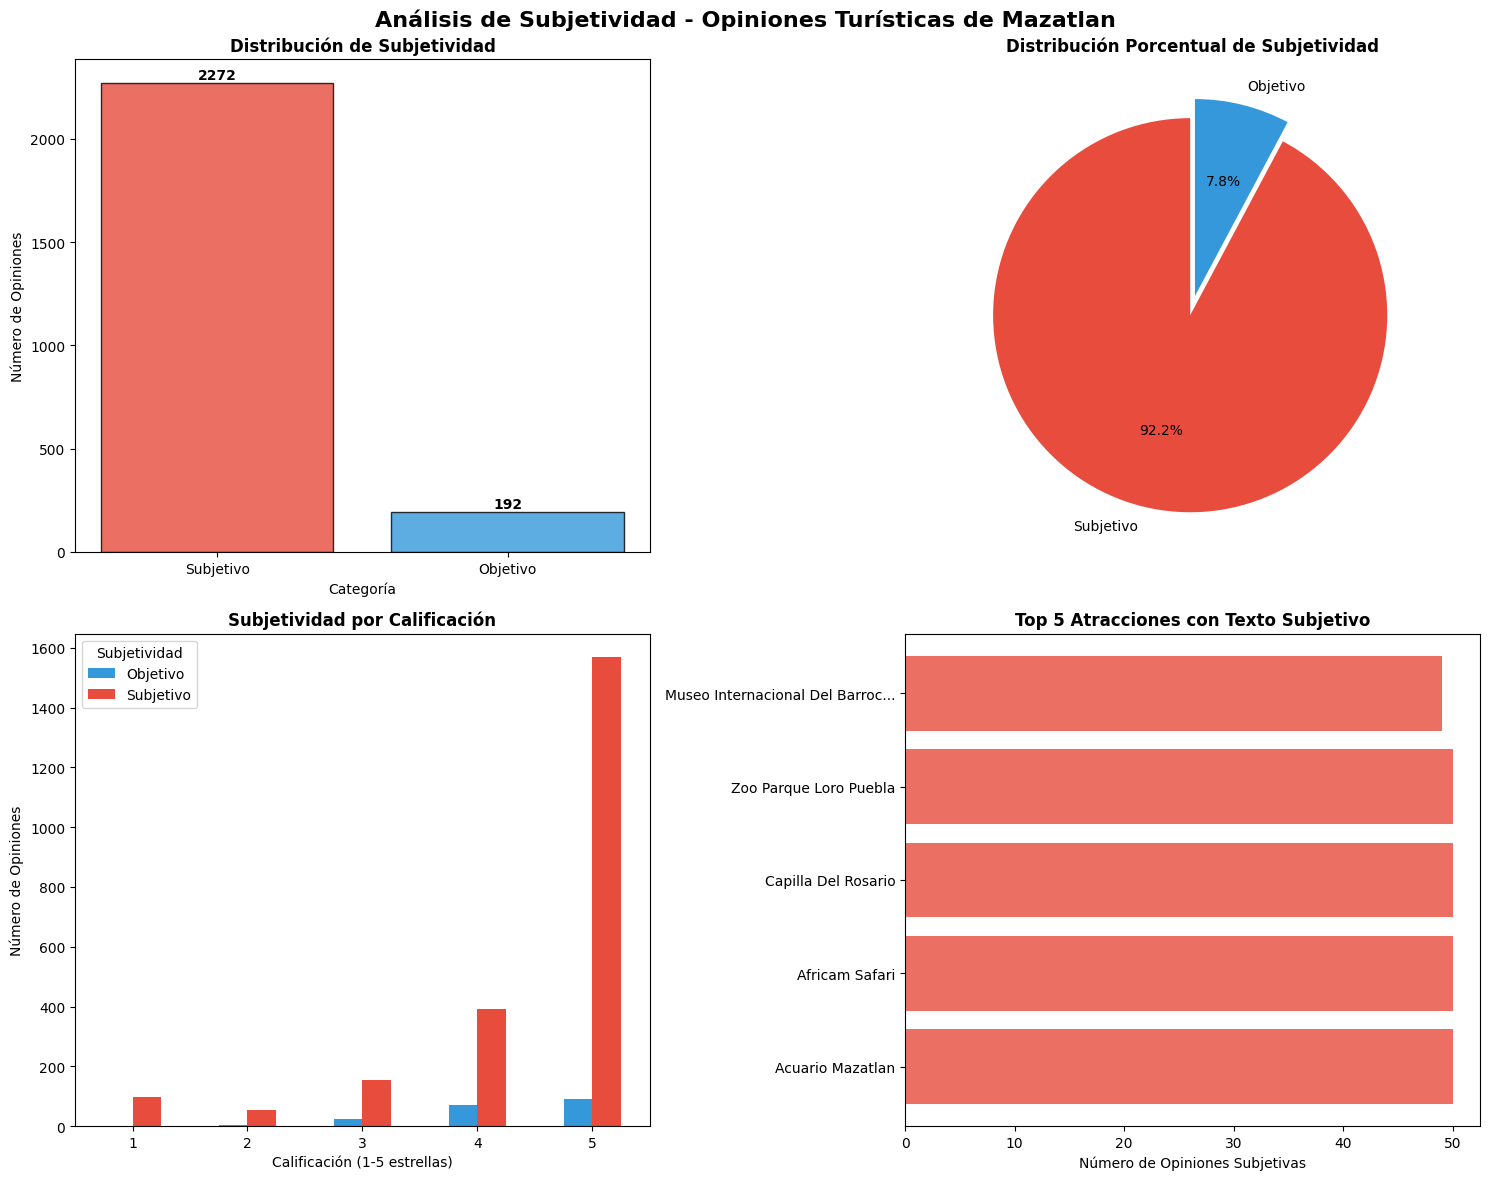

In [6]:
from subjetividad import VisualizadorSubjetividad
import matplotlib.pyplot as plt

visualizador = VisualizadorSubjetividad()
ciudad = df_con_subjetividad['Ciudad'].iloc[0]

fig_basicas = visualizador.crear_visualizaciones_basicas(df_con_subjetividad, ciudad)
plt.show()

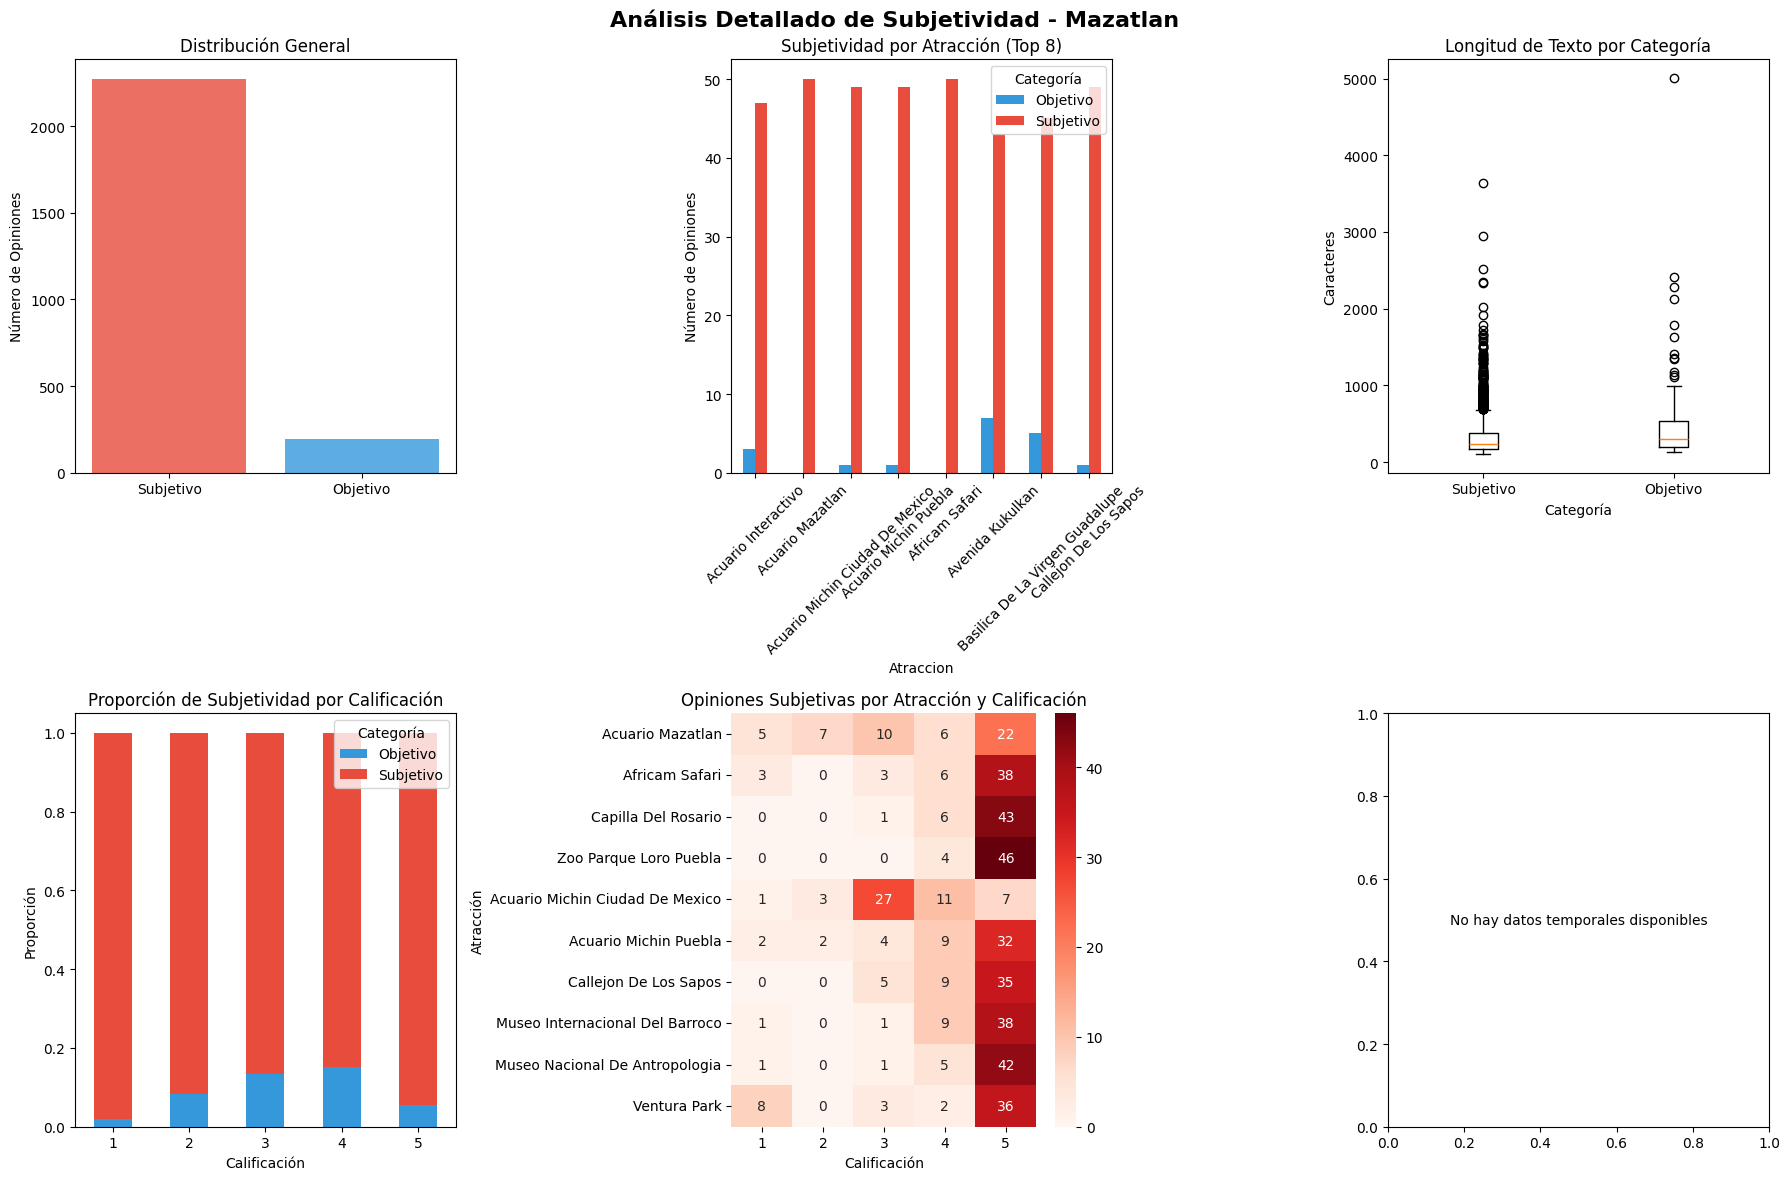

In [7]:
fig_detalladas = visualizador.crear_visualizacion_detallada(df_con_subjetividad, ciudad)
plt.show()

# Análisis Combinado: Subjetividad vs Sentimientos

En esta sección analizaremos la relación entre la subjetividad del texto y los sentimientos expresados. Esto nos permitirá entender:

- **¿El texto subjetivo tiende a ser más positivo o negativo?**
- **¿El texto objetivo mantiene neutralidad en los sentimientos?**
- **¿Cómo se distribuyen los sentimientos dentro de cada categoría de subjetividad?**
- **¿Existe correlación entre ser subjetivo y expresar sentimientos extremos?**

Este análisis combinado nos dará una visión más completa del comportamiento emocional y la objetividad en las opiniones turísticas.

In [8]:
estadisticas_combinadas = analizador.analizar_subjetividad_por_sentimientos(df_con_subjetividad)
analizador.mostrar_estadisticas_subjetividad_sentimientos(estadisticas_combinadas)


📊 ANÁLISIS DE SUBJETIVIDAD vs SENTIMIENTOS
📈 Total de registros analizados: 2464
📝 Texto subjetivo: 2272 (92.2%)
📋 Texto objetivo: 192 (7.8%)

📋 TABLA CRUZADA COMPLETA:
----------------------------------------
SentimientoPorHF   Negativo  Neutro  Positivo   All
SubjetividadConHF                                  
Objetivo                 15      26       151   192
Subjetivo               236     122      1914  2272
All                     251     148      2065  2464

📊 DISTRIBUCIÓN PORCENTUAL POR SUBJETIVIDAD:
--------------------------------------------------
SentimientoPorHF   Negativo  Neutro  Positivo
SubjetividadConHF                            
Objetivo                7.8    13.5      78.6
Subjetivo              10.4     5.4      84.2

🔍 SENTIMIENTOS EN TEXTO SUBJETIVO:
----------------------------------------
   • Positivo: 1914 (84.2%)
   • Negativo: 236 (10.4%)
   • Neutro: 122 (5.4%)

🔍 SENTIMIENTOS EN TEXTO OBJETIVO:
----------------------------------------
   • Positivo: 15

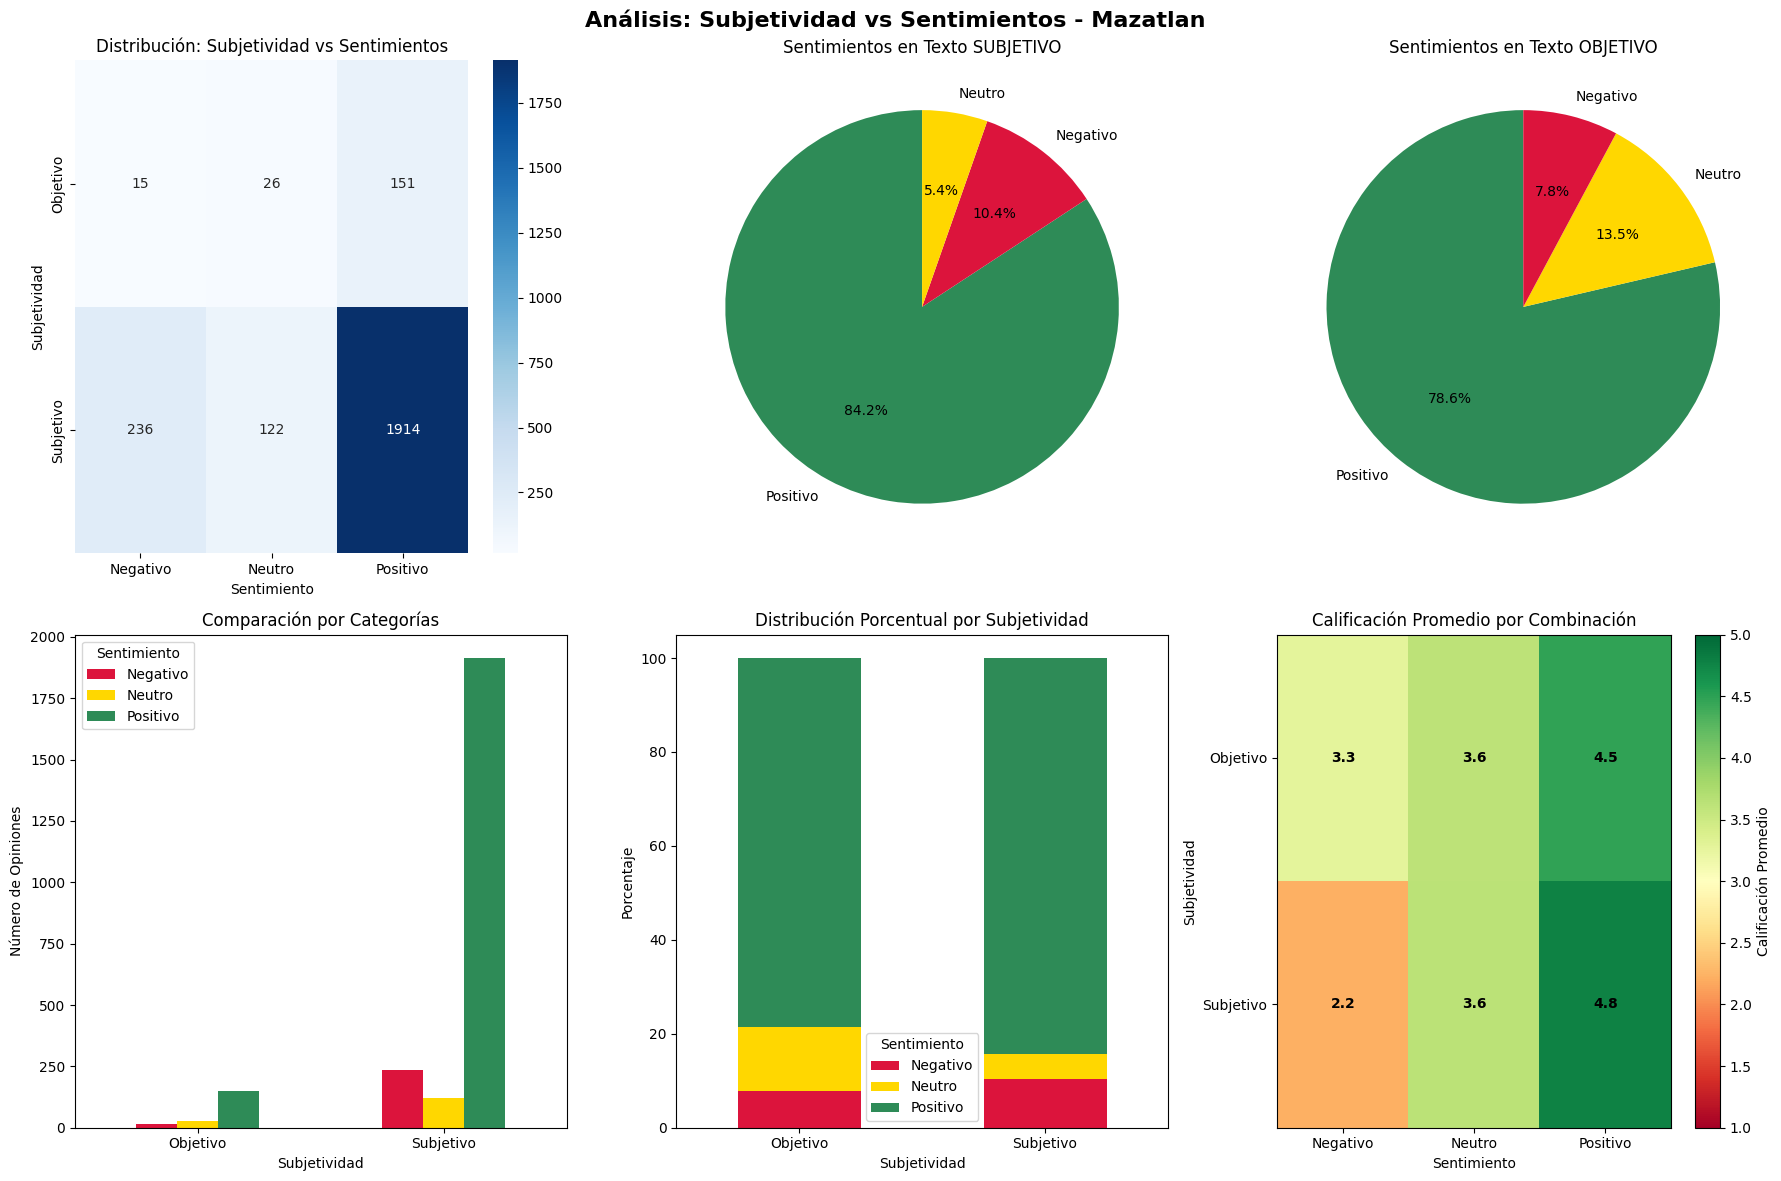

In [9]:
fig_combinado = visualizador.crear_visualizacion_subjetividad_vs_sentimientos(df_con_subjetividad, ciudad)
plt.show()

In [10]:
sentimientos = df_con_subjetividad['SentimientoPorHF'].unique()

for sentimiento in sentimientos:
    df_sentimiento = df_con_subjetividad[df_con_subjetividad['SentimientoPorHF'] == sentimiento]
    total_sentimiento = len(df_sentimiento)
    
    print(f"\n🎯 {sentimiento.upper()}: {total_sentimiento} opiniones")
    
    subjetividad_en_sentimiento = df_sentimiento['SubjetividadConHF'].value_counts()
    for subj_tipo, cantidad in subjetividad_en_sentimiento.items():
        porcentaje = (cantidad / total_sentimiento) * 100
        print(f"   • {subj_tipo}: {cantidad} ({porcentaje:.1f}%)")


🎯 POSITIVO: 2065 opiniones
   • Subjetivo: 1914 (92.7%)
   • Objetivo: 151 (7.3%)

🎯 NEGATIVO: 251 opiniones
   • Subjetivo: 236 (94.0%)
   • Objetivo: 15 (6.0%)

🎯 NEUTRO: 148 opiniones
   • Subjetivo: 122 (82.4%)
   • Objetivo: 26 (17.6%)


In [11]:
analizador.mostrar_ejemplos_categoria(df_con_subjetividad, categoria='Subjetivo', n_ejemplos=3)


🎯 EJEMPLOS DE TEXTO SUBJETIVO
----------------------------------------------------------------------

📌 Ejemplo 1:
   🏛️ Atracción: Museo Del Templo Mayor
   ⭐ Calificación: 5 estrellas
   📝 Texto completo:
      "Maravilloso. Este lugar está muy bonito, aunque desde afuera se ven unas ruinas cuando entras descubres un mundo prehistórico muy bonito y con mucha historia."
   🏷️ Categoría: Subjetivo

📌 Ejemplo 2:
   🏛️ Atracción: Callejon De Los Sapos
   ⭐ Calificación: 4 estrellas
   📝 Texto completo:
      "Interesante. El lugar es acogedor, lo ideal es ir los fines de semana -con tiempo- para discurrir en el tianguis, una especie de mercado de las pulgas."
   🏷️ Categoría: Subjetivo

📌 Ejemplo 3:
   🏛️ Atracción: Ventura Park
   ⭐ Calificación: 5 estrellas
   📝 Texto completo:
      "Carruzel. Excelente, muy bien la chava sarahy muy divertido agradable la gente sin filas  muy bonita la temática de hallowen recomendado el parque."
   🏷️ Categoría: Subjetivo


In [12]:
analizador.mostrar_ejemplos_categoria(df_con_subjetividad, categoria='Objetivo', n_ejemplos=3)


🎯 EJEMPLOS DE TEXTO OBJETIVO
----------------------------------------------------------------------

📌 Ejemplo 1:
   🏛️ Atracción: Avenida Kukulkan
   ⭐ Calificación: 4 estrellas
   📝 Texto completo:
      "Un símbolo de la zona hotelera y de todo Cancún. La avenida Kukulcán a lo largo de sus 26 kms. une todos los hoteles de la zona hotelera de norte a sur, inicia saliendo de Cancún y termina cerca del acceso al aeropuerto. Las numerosas líneas de "camiones" (ómnibus) trasladan a los turistas de los hoteles más distantes a la zona más céntrica y viceversa."
   🏷️ Categoría: Objetivo

📌 Ejemplo 2:
   🏛️ Atracción: Museo Maya De Cancun Y Zona Arqueologica De San Miguelito
   ⭐ Calificación: 4 estrellas
   📝 Texto completo:
      "Un bonito descanso del complejo. Mi esposa y yo pasamos unos 45 minutos explorando los terrenos y otros 45 minutos experimentando las exhibiciones interiores. Habríamos pasado más tiempo afuera mirando las ruinas mayas reales, pero los recientes aguaceros dejar

In [13]:
analizador.mostrar_todos_los_ejemplos(df_con_subjetividad, n_ejemplos=5)

🔍 EJEMPLOS REPRESENTATIVOS POR CATEGORÍA DE SUBJETIVIDAD

🎯 EJEMPLOS DE TEXTO SUBJETIVO
----------------------------------------------------------------------

📌 Ejemplo 1:
   🏛️ Atracción: Plaza Machado
   ⭐ Calificación: 5 estrellas
   📝 Texto completo:
      "Tranquilo. Nos encanta pasear por el Machado. Gran lugar para relajarse, tomar un café o una copa, y fantásticos restaurantes para todos los gustos."
   🏷️ Categoría: Subjetivo

📌 Ejemplo 2:
   🏛️ Atracción: Isla De Los Venados
   ⭐ Calificación: 5 estrellas
   📝 Texto completo:
      "La isla del medio. Es algo que uno no puede dejar pasar al venir a Mazatlan, fuimos en el catamarán sensation y no pudimos ir en mejor tour."
   🏷️ Categoría: Subjetivo

📌 Ejemplo 3:
   🏛️ Atracción: Acuario Michin Puebla
   ⭐ Calificación: 4 estrellas
   📝 Texto completo:
      "Entretenido. Las rutas extremas me parecieron lo mejor del acuario porque recorres todo el acuario y te reta pero me gustaría ver más especies."
   🏷️ Categoría: Subjeti

In [14]:
# Tabla cruzada subjetividad vs calificaciones
tabla_cruzada = pd.crosstab(df_con_subjetividad['SubjetividadConHF'], df_con_subjetividad['Calificacion'], margins=True)
display(tabla_cruzada)

tabla_porcentual = pd.crosstab(df_con_subjetividad['SubjetividadConHF'], df_con_subjetividad['Calificacion'], normalize='columns') * 100
display(tabla_porcentual.round(1))

Calificacion         1   2    3    4     5   All
SubjetividadConHF                               
Objetivo             2   5   24   70    91   192
Subjetivo           99  55  156  393  1569  2272
All                101  60  180  463  1660  2464

Calificacion          1     2     3     4     5
SubjetividadConHF                              
Objetivo            2.0   8.3  13.3  15.1   5.5
Subjetivo          98.0  91.7  86.7  84.9  94.5

In [15]:
analizador.generar_resumen_final(df_con_subjetividad)


 RESUMEN FINAL 
✅ Análisis de subjetividad completado exitosamente
🏙️ Ciudad analizada: Mazatlan
📊 Total de opiniones analizadas: 2464
🎯 Atracciones únicas: 50
🤖 Modelo utilizado: GroNLP/mdebertav3-subjectivity-multilingual
📊 ESTADÍSTICAS DESCRIPTIVAS DE SUBJETIVIDAD
🔢 DISTRIBUCIÓN DE SUBJETIVIDAD:
----------------------------------------
 Subjetivo: 2272 registros ( 92.2%)
  Objetivo: 192 registros (  7.8%)

📈 TOTAL DE REGISTROS: 2464

📝 DESCRIPCIÓN DE CATEGORÍAS:
----------------------------------------
 Subjetivo: Texto que expresa opiniones, emociones, evaluaciones personales
  Objetivo: Texto que presenta hechos, información factual sin opiniones


Hipotesis: tenemos muy pocas opiniones objetivas debido a que las personas suelen tener una opinion mixta.

Se validara en el siguiente notebook

In [16]:
# Sobrescribir el dataset original agregando la columna SubjetividadConHF
import pandas as pd

ruta_dataset_original = '../data/processed/dataset_opiniones_analisis.csv'

# Verificar que tenemos la columna SubjetividadConHF
if 'SubjetividadConHF' not in df_con_subjetividad.columns:
    print("❌ Error: La columna SubjetividadConHF no se encontró en el dataset")
else:
    # Sobrescribir el archivo original agregando la nueva columna
    df_con_subjetividad.to_csv(ruta_dataset_original, index=False, encoding='utf-8')
    
    print(f"✅ Dataset original actualizado en: {ruta_dataset_original}")
    print(f"📊 Total de registros: {len(df_con_subjetividad)}")
    print(f"📋 Columnas incluidas: {list(df_con_subjetividad.columns)}")
    
    # Mostrar distribución de la nueva columna
    distribucion_subjetividad = df_con_subjetividad['SubjetividadConHF'].value_counts()
    print(f"\n📈 Distribución de subjetividad:")
    for categoria, cantidad in distribucion_subjetividad.items():
        porcentaje = (cantidad / len(df_con_subjetividad)) * 100
        print(f"   {categoria}: {cantidad} opiniones ({porcentaje:.1f}%)")
    
    print(f"\n✅ El dataset ahora incluye la columna 'SubjetividadConHF' y está listo para uso en análisis posteriores")

✅ Dataset original actualizado en: ../data/processed/dataset_opiniones_analisis.csv
📊 Total de registros: 2464
📋 Columnas incluidas: ['Titulo', 'Review', 'Calificacion', 'FechaEstadia', 'Ciudad', 'Atraccion', 'TituloReview', 'SentimientoPorCalificacion', 'SentimientoPorHF', 'SentimientoPorCardiff', 'SubjetividadConHF']

📈 Distribución de subjetividad:
   Subjetivo: 2272 opiniones (92.2%)
   Objetivo: 192 opiniones (7.8%)

✅ El dataset ahora incluye la columna 'SubjetividadConHF' y está listo para uso en análisis posteriores
